In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the stock ticker symbol and time range
ticker = "GOOGL"
period = "5y" # Last 5 years

# Download the data
df = yf.download(ticker, period=period)

# Flatten the columns (corrects MultiIndex columns from yfinance)
# This converts columns like ('Adj Close', 'GOOGL') to simply 'Adj Close'
df.columns = df.columns.droplevel(1)

# Display the first 5 rows of the DataFrame
print("First 5 rows of the data (with flattened columns):")
print(df.head())

# Display general DataFrame information (data types, null values)
print("\nDataFrame Information:")
df.info()

# Display basic descriptive statistics
print("\nDescriptive Statistics of the data:")
print(df.describe())


/tmp/ipython-input-681761596.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period)
[*********************100%***********************]  1 of 1 completed

First 5 rows of the data (with flattened columns):
Price           Close       High        Low       Open    Volume
Date                                                            
2020-07-31  73.953964  74.802376  72.266582  74.406253  91468000
2020-08-03  73.696014  74.440049  73.147303  74.105561  45482000
2020-08-04  73.225838  74.210434  72.765100  73.892342  37212000
2020-08-05  73.513611  74.055860  73.122455  73.400793  29134000
2020-08-06  74.798897  74.864505  73.156252  73.367487  33306000

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2020-07-31 to 2025-07-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1256 non-null   float64
 1   High    1256 non-null   float64
 2   Low     1256 non-null   float64
 3   Open    1256 non-null   float64
 4   Volume  1256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB

Descriptive Statistics of the data:

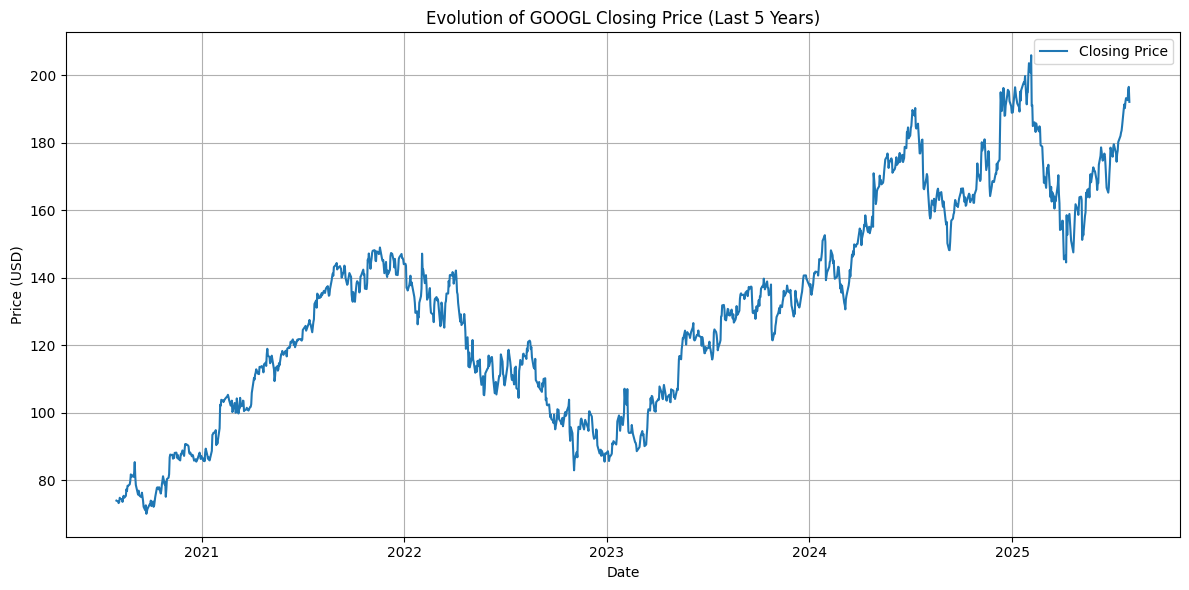

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price')
plt.title(f'Evolution of {ticker} Closing Price (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

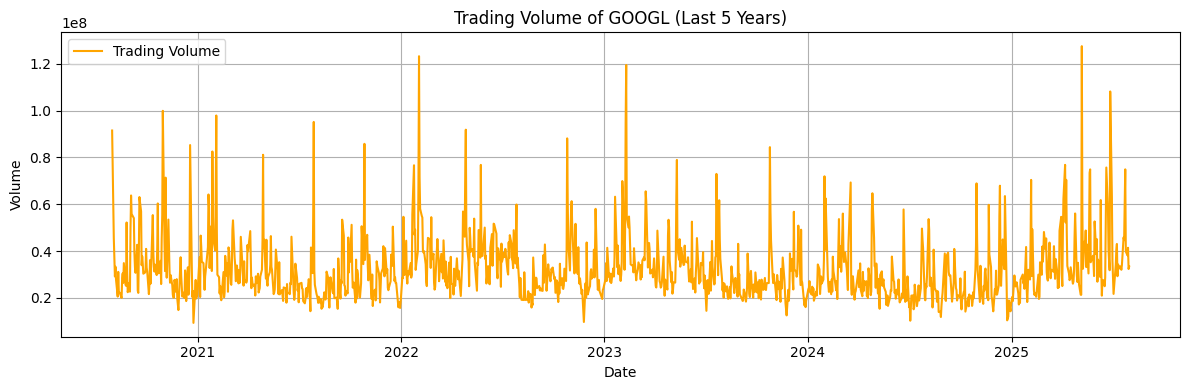

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(df['Volume'], label='Trading Volume', color='orange')
plt.title(f'Trading Volume of {ticker} (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

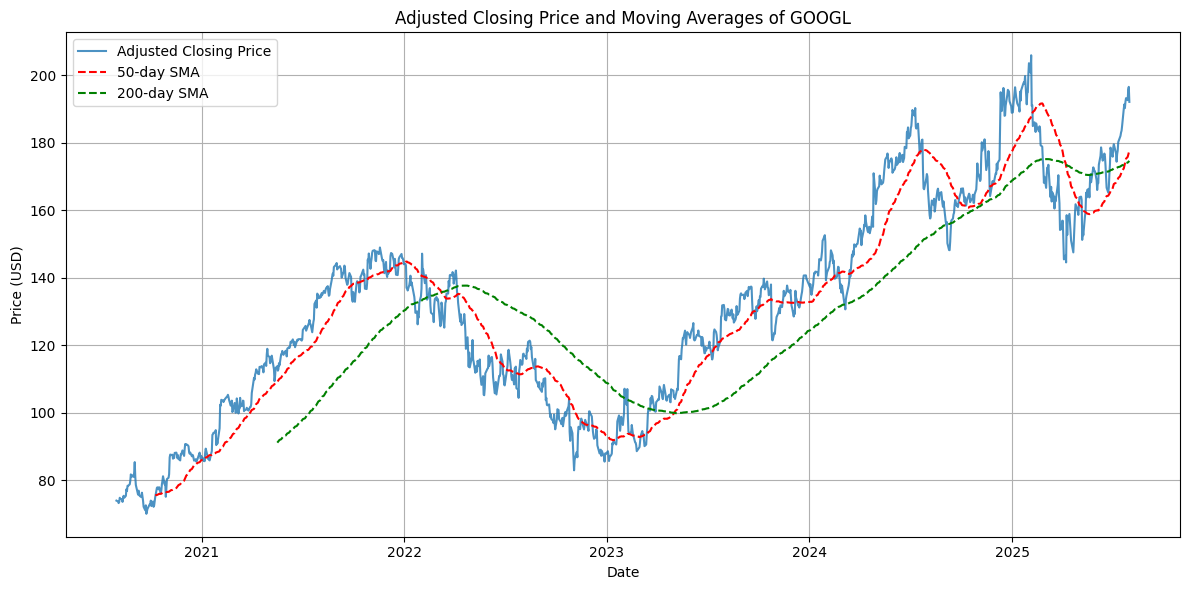

In [9]:
# Calculate Simple Moving Averages (SMA)
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Adjusted Closing Price', alpha=0.8)
plt.plot(df['SMA_50'], label='50-day SMA', color='red', linestyle='--')
plt.plot(df['SMA_200'], label='200-day SMA', color='green', linestyle='--')
plt.title(f'Adjusted Closing Price and Moving Averages of {ticker}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

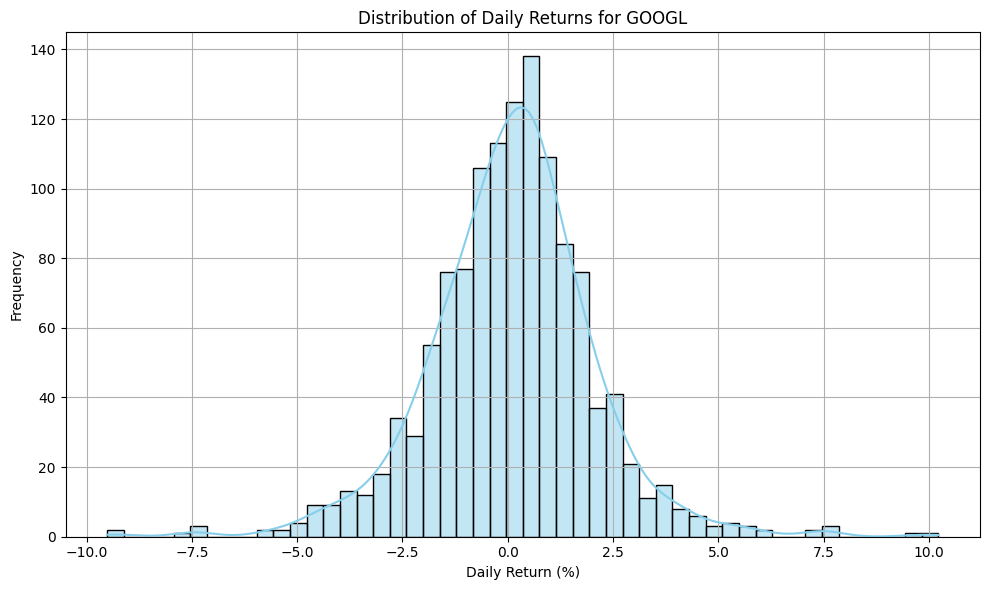


Descriptive Statistics of Daily Returns:
count    1255.000000
mean        0.095124
std         1.952192
min        -9.509396
25%        -0.956541
50%         0.141885
75%         1.154637
max        10.224363
Name: Daily_Return, dtype: float64


In [11]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change() * 100 # Multiply by 100 for percentage

plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True, color='skyblue')
plt.title(f'Distribution of Daily Returns for {ticker}')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display descriptive statistics of daily returns
print("\nDescriptive Statistics of Daily Returns:")
print(df['Daily_Return'].dropna().describe())

In [13]:
# --- STEP 4: DATA PREPROCESSING ---

# 1. Creation of Lag Features
# We will use the adjusted closing price from previous days as predictor features.
# We create lags for 1, 2, 3, 4, and 5 days.
# These will represent the closing prices of the 5 days prior to the current day.
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Close_Lag3'] = df['Close'].shift(3)
df['Close_Lag4'] = df['Close'].shift(4)
df['Close_Lag5'] = df['Close'].shift(5)

# We can also consider lagged volume as a feature,
# as volume from previous days might influence the current price.
df['Volume_Lag1'] = df['Volume'].shift(1)


# 2. Handling Null Values (NaNs)
# Lagged values introduce NaNs in the first few rows.
# We will remove these rows with NaNs to ensure complete data for the model.
print("Rows before dropping NaNs:", df.shape[0])
df.dropna(inplace=True) # inplace=True modifies the DataFrame directly
print("Rows after dropping NaNs:", df.shape[0])


# 3. Feature Selection
# Define our features (X) and our target variable (y)

# X will be the lag variables we just created
features = [
    'Close_Lag1', 'Close_Lag2', 'Close_Lag3',
    'Close_Lag4', 'Close_Lag5', 'Volume_Lag1'
]
X = df[features]

# y will be the current adjusted closing price (what we want to predict)
y = df['Close']

# Optional: Display the first few rows of X and y to verify
print("\nFirst 5 rows of features (X):")
print(X.head())

print("\nFirst 5 rows of the target variable (y):")
print(y.head())

print("\nFinal dimensions of X:", X.shape)
print("Final dimensions of y:", y.shape)

Rows before dropping NaNs: 1256
Rows after dropping NaNs: 1057

First 5 rows of features (X):
Price       Close_Lag1  Close_Lag2  Close_Lag3  Close_Lag4  Close_Lag5  \
Date                                                                     
2021-05-17  113.239861  110.787575  109.356651  112.826340  113.904381   
2021-05-18  113.763718  113.239861  110.787575  109.356651  112.826340   
2021-05-19  112.449104  113.763718  113.239861  110.787575  109.356651   
2021-05-20  112.897911  112.449104  113.763718  113.239861  110.787575   
2021-05-21  114.659851  112.897911  112.449104  113.763718  113.239861   

Price       Volume_Lag1  
Date                     
2021-05-17   31996000.0  
2021-05-18   21598000.0  
2021-05-19   22204000.0  
2021-05-20   23684000.0  
2021-05-21   32352000.0  

First 5 rows of the target variable (y):
Date
2021-05-17    113.763718
2021-05-18    112.449104
2021-05-19    112.897911
2021-05-20    114.659851
2021-05-21    114.022659
Name: Close, dtype: float64

Fina


Dimensions of X_train: (845, 6)
Dimensions of X_test: (212, 6)
Dimensions of y_train: (845,)
Dimensions of y_test: (212,)

Training the Linear Regression model...
Model trained successfully.

Making predictions on the test set...

Evaluating model performance:
Mean Absolute Error (MAE): 2.59 USD
Mean Squared Error (MSE): 12.07
Root Mean Squared Error (RMSE): 3.47 USD
Coefficient of Determination (R-squared): 0.93


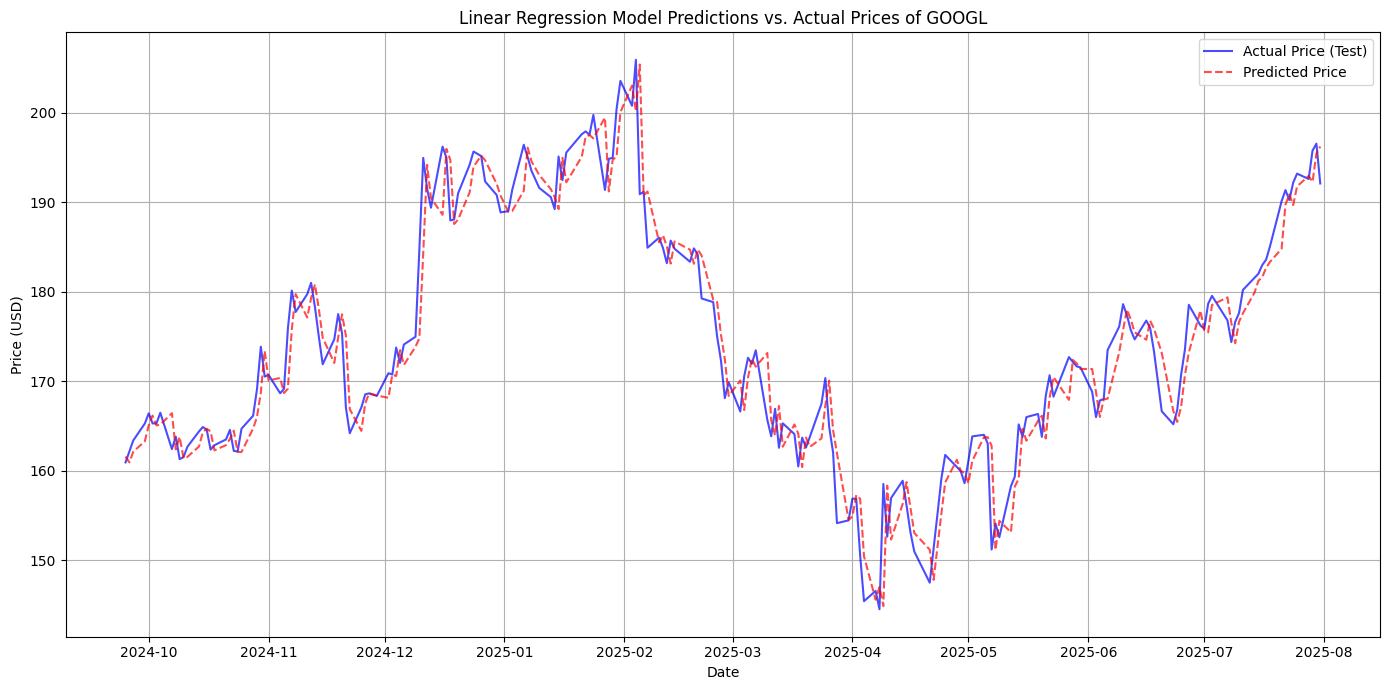

In [14]:
# --- STEP 5: BASIC MODELING AND EVALUATION ---

# Import necessary libraries for modeling and evaluation
from sklearn.model_selection import train_test_split # Not directly used for chronological time series, but common
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Needed for square root in RMSE

# 1. Data Splitting (Train-Test Split)
# For time series, we split the data chronologically.
# We will use, for example, the oldest 80% of data for training
# and the most recent 20% for testing.

# Calculate the split index
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

# Split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"\nDimensions of X_train: {X_train.shape}")
print(f"Dimensions of X_test: {X_test.shape}")
print(f"Dimensions of y_train: {y_train.shape}")
print(f"Dimensions of y_test: {y_test.shape}")


# 2. Linear Regression Model Training
print("\nTraining the Linear Regression model...")
model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully.")


# 3. Making Predictions
print("\nMaking predictions on the test set...")
predictions = model.predict(X_test)


# 4. Model Performance Evaluation
print("\nEvaluating model performance:")

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f} USD")

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} USD")

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f"Coefficient of Determination (R-squared): {r2:.2f}")

# Optional: Visualize predictions vs. actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price (Test)', color='blue', alpha=0.7)
plt.plot(y_test.index, predictions, label='Predicted Price', color='red', linestyle='--', alpha=0.7)
plt.title(f'Linear Regression Model Predictions vs. Actual Prices of {ticker}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()